# Part 2: Network exploration with NetworkX

##  2.1: Importing network-structured data sets

NetworkX can read variuos formats for representing graphs and network, among them `.gml`, `.GraphML`, `.GEFX`, `.json` and `.yaml`. Additionaly, it can also read simple text files encoding adjacency lists and edge lists.

We've included a dataset representing the social circles of 10 individuals on Facebook. The network is given as an edge list in a simple text format, and saved as `facebook_combined.txt`.

The dataset is part of SNAP - the Stanford Network Analysis Project - which can be found here: https://snap.stanford.edu/index.html .
The dataset we'll be using can be found here: https://snap.stanford.edu/data/egonets-Facebook.html

Let's take a look at five random lines of this file:

In [20]:
FB_FNAME = 'facebook_combined.txt'
with open(FB_FNAME, 'r') as dataset:
    from random import shuffle
    lines = [line for line in dataset]
    shuffle(lines)
    for line in lines[:5]:
        print(line)

2132 2491

1979 2408

2445 2526

2093 2352

1126 1222



As you can see, each line contains two strings seperated by a whitespace, represting a single edge between the two nodes of the given names.

---
 
Note: A third argument can be given in each line, representing the weight of the edge. If missing, all edges are assumed of have an equal weight, resulting in an unwighted graph.

The above edge list can be imported into a NetworkX Graph object using the `read_edgelist()` function:

In [2]:
import networkx as nx
G = nx.read_edgelist('facebook_combined.txt')

1.11


In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


The next step is to have a look at the network. There are several types of algorithms that draw network in a nice-looking way; among them, force-directed graph drawing is one of the most common approaches.
(see more here: https://en.wikipedia.org/wiki/Force-directed_graph_drawing)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:

# Draw the graph with Matplotlib with options for node positions, labeling, titles, etc...
nx.draw_networkx(G)

In [9]:
# Position nodes using the Fruchterman-Reingold force-directed algorithm.
spr_layout = nx.spring_layout(G, iterations=20)

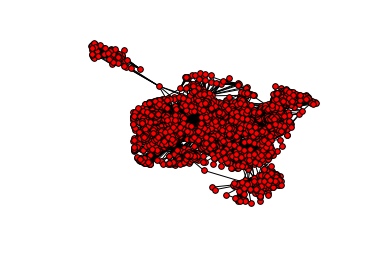

In [10]:
plt.axis("off")
# Draw the graph with Matplotlib with options for node positions, labeling, titles, etc...
nx.draw_networkx(G, pos=spr_layout, with_labels=False, node_size=32)

In [12]:
import community

In [15]:
partitions = community.best_partition(G)
values = [partitions.get(node) for node in G.nodes()]

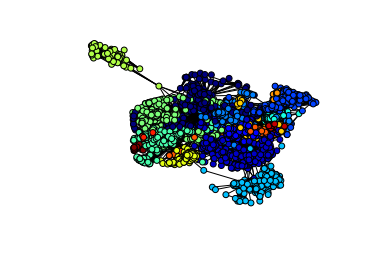

In [18]:
plt.axis("off")
nx.draw_networkx(G, pos = spr_layout, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)